# Uniform- Decaying Step Size 

0
100000
200000
300000
400000
500000
600000
QA: 16.571712009189877
QB: 16.56165217330989
--- Double Q took 48.32331991195679 seconds ---
0
100000
200000
300000
400000
500000
600000
Q: 3.8401311320662264
--- Regular Q took 96.06552219390869 seconds ---


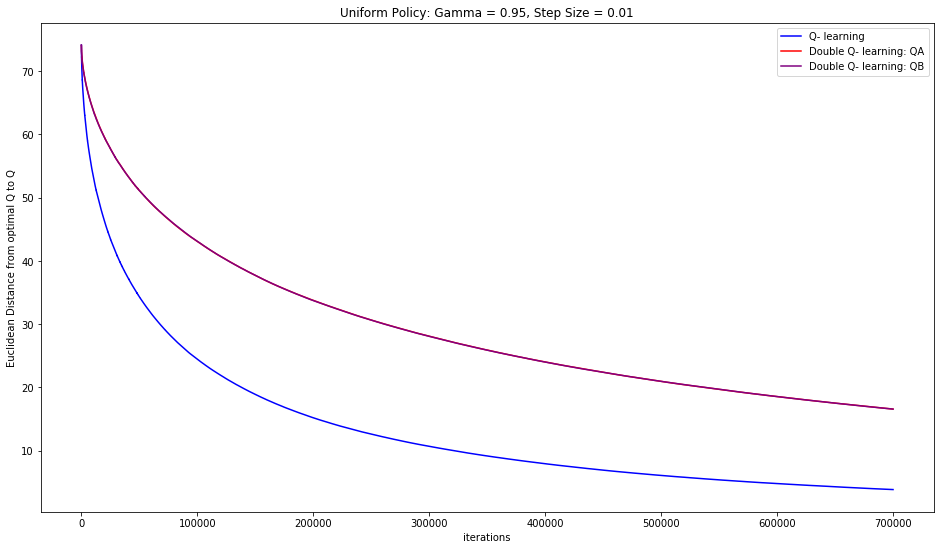

In [4]:
### initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)


class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 700000, min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        #self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.step_size = 0.01
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.QA = np.zeros((env.num_state, env.num_action)) 
        self.QB = np.zeros((env.num_state, env.num_action))
        self.QTable = np.zeros((env.num_state, env.num_action))


    def action(self, state):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        #print("a:", action)
        #action = list(self.env.actions).index(action)
        #print("i:", action)
        return action
    
    def chooseQ_function(self):
        return random.choice(["QA", "QB"])
    
    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])

    def QA_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QA-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        #self.QTable[state][action] += alpha * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        self.QA[state][action] += step_size * (reward + self.gamma * (self.QB[new_state][action_prime]) - self.QA[state][action])
        return
    
    def QB_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QB-values'''
        self.QB[state][action] += step_size * (reward + self.gamma * (self.QA[new_state][action_prime]) - self.QB[state][action])
        return
    
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
def Doublelearning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QAList = []
    QBList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):
        #print("q", Qlearning.max_episodes)
        #print(e)
        if e % 100000 == 0:
            print(e)
         #self.env.reset()
        step_size = Qlearning.decay_step_size(e)
        action = Qlearning.action(state)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        if Qlearning.chooseQ_function() == "QA":
            action_prime = np.argmax(Qlearning.QA[new_state])
            Qlearning.QA_Update(state, action, action_prime, reward, new_state, step_size)
        if Qlearning.chooseQ_function() == "QB":
            action_prime = np.argmax(Qlearning.QB[new_state])
            Qlearning.QB_Update(state, action, action_prime, reward, new_state, step_size)
            #self.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QAList.append(np.linalg.norm(Qlearning.QA - Qlearning.QFunction))
        QBList.append(np.linalg.norm(Qlearning.QB - Qlearning.QFunction))
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
        #print(Qlearning.QA)
    return QAList, QBList
    
def learning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):
        if e % 100000 == 0:
            print(e)
        step_size = Qlearning.decay_step_size(e)
        action = Qlearning.action(state)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        Qlearning.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QList.append(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction))
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
    return QList
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)  #MarkovDP)
    QAList, QBList = Doublelearning(solve)
    
    print("QA:", min(QAList))
    print("QB:", min(QBList))
    #print(QAList)
    print("--- Double Q took %s seconds ---" % (time.time() - start_time))
    
    solve = Qlearning(env)#MarkovDP)
    
    QList = learning(solve)
    print("Q:", min(QList))
    #print(QList)
    print("--- Regular Q took %s seconds ---" % (time.time() - start_time))
    # print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q- learning')
    ax2.plot(QAList,  # epsilon_hist,
             color='r',
             label='Double Q- learning: QA')
    ax2.plot(QBList,  # epsilon_hist,
             color='purple',
             label='Double Q- learning: QB')
    ax2.set(title='Uniform Policy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Euclidean Distance from optimal Q to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()
    
# it reduces at exactly the same rate and has a longer rate of convergence than regualr Q learning (is this because of the lack of overestimation??)

Uniform Policy- Q learning starts to converge faster than Double. And QB and QA work at the same/similar pace. 

# Uniform- Constant Step Size

0
100000
200000
300000
400000
500000
600000
QA: 0.17275743863086468
QB: 0.1757366979050065
--- Double Q took 48.15859413146973 seconds ---
0
100000
200000
300000
400000
500000
600000
Q: 0.03405977143272257
--- Regular Q took 89.58641624450684 seconds ---


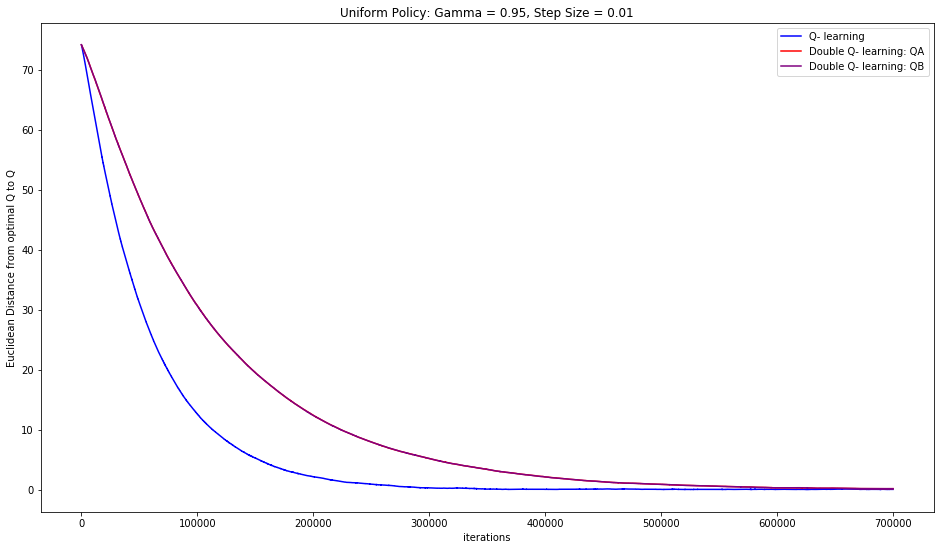

In [5]:
### initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)


class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 700000, min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        #self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.step_size = 0.01
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.QA = np.zeros((env.num_state, env.num_action)) 
        self.QB = np.zeros((env.num_state, env.num_action))
        self.QTable = np.zeros((env.num_state, env.num_action))


    def action(self, state):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        #print("a:", action)
        #action = list(self.env.actions).index(action)
        #print("i:", action)
        return action
    
    def chooseQ_function(self):
        return random.choice(["QA", "QB"])
    
    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])

    def QA_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QA-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        #self.QTable[state][action] += alpha * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        self.QA[state][action] += step_size * (reward + self.gamma * (self.QB[new_state][action_prime]) - self.QA[state][action])
        return
    
    def QB_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QB-values'''
        self.QB[state][action] += step_size * (reward + self.gamma * (self.QA[new_state][action_prime]) - self.QB[state][action])
        return
    
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
def Doublelearning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QAList = []
    QBList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):
        #print("q", Qlearning.max_episodes)
        #print(e)
        if e % 100000 == 0:
            print(e)
         #self.env.reset()
        step_size = Qlearning.step_size
        action = Qlearning.action(state)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        if Qlearning.chooseQ_function() == "QA":
            action_prime = np.argmax(Qlearning.QA[new_state])
            Qlearning.QA_Update(state, action, action_prime, reward, new_state, step_size)
        if Qlearning.chooseQ_function() == "QB":
            action_prime = np.argmax(Qlearning.QB[new_state])
            Qlearning.QB_Update(state, action, action_prime, reward, new_state, step_size)
            #self.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QAList.append(np.linalg.norm(Qlearning.QA - Qlearning.QFunction))
        QBList.append(np.linalg.norm(Qlearning.QB - Qlearning.QFunction))
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
        #print(Qlearning.QA)
    return QAList, QBList
    
def learning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):
        if e % 100000 == 0:
            print(e)
        step_size = Qlearning.step_size
        action = Qlearning.action(state)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        Qlearning.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QList.append(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction))
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
    return QList
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)  #MarkovDP)
    QAList, QBList = Doublelearning(solve)
    
    print("QA:", min(QAList))
    print("QB:", min(QBList))
    #print(QAList)
    print("--- Double Q took %s seconds ---" % (time.time() - start_time))
    
    solve = Qlearning(env)#MarkovDP)
    
    QList = learning(solve)
    print("Q:", min(QList))
    #print(QList)
    print("--- Regular Q took %s seconds ---" % (time.time() - start_time))
    # print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q- learning')
    ax2.plot(QAList,  # epsilon_hist,
             color='r',
             label='Double Q- learning: QA')
    ax2.plot(QBList,  # epsilon_hist,
             color='purple',
             label='Double Q- learning: QB')
    ax2.set(title='Uniform Policy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Euclidean Distance from optimal Q to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()
    
# it reduces at exactly the same rate and has a longer rate of convergence than regualr Q learning (is this because of the lack of overestimation??)

Attemped on constant step size and diminishing for uniform. With both MDPs the runtime was shorted for double Q learning, but there were more iterations for convergence 

# Weighted Uniform Policy- Constant Step Size

0
100000
200000
300000
400000
500000
600000
QA: 0.7527265920181233
QB: 0.7461809144535628
--- Double Q took 19.913024187088013 seconds ---
0
100000
200000
300000
400000
500000
600000
Q: 0.0406591361840939
--- Regular Q took 37.54135298728943 seconds ---


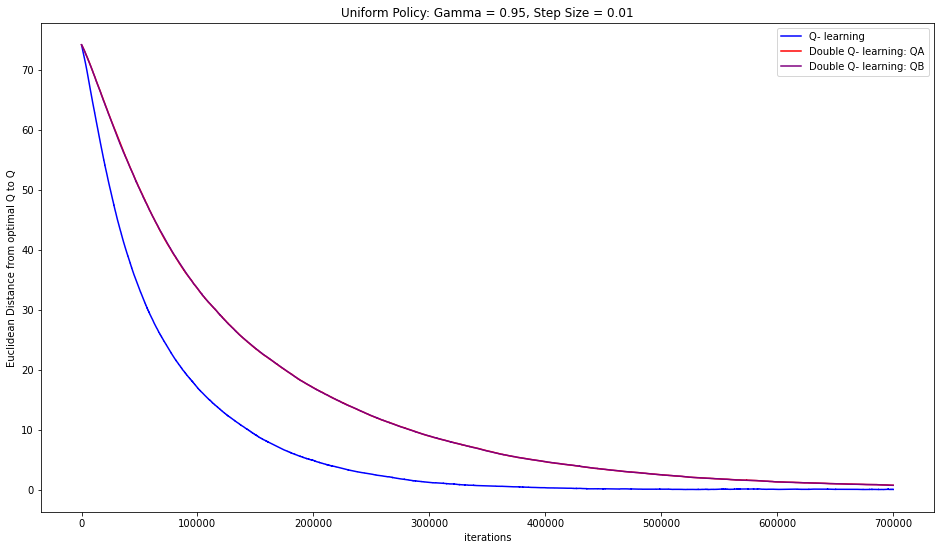

In [1]:
### initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)


class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 700000, min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        #self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.step_size = 0.01
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.QA = np.zeros((env.num_state, env.num_action)) 
        self.QB = np.zeros((env.num_state, env.num_action))
        self.QTable = np.zeros((env.num_state, env.num_action))


    def action(self, state):
        ''' choose an action using the epsilon policy '''
        #action = random.choice(self.env.actions)
        action = random.choices(self.env.actions, weights=[(4/8), (1/8), (3/8)], k=1)[0]
        #print("a:", action)
        #action = list(self.env.actions).index(action)
        #print("i:", action)
        return action
    
    def chooseQ_function(self):
        return random.choice(["QA", "QB"])
    
    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])

    def QA_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QA-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        #self.QTable[state][action] += alpha * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        self.QA[state][action] += step_size * (reward + self.gamma * (self.QB[new_state][action_prime]) - self.QA[state][action])
        return
    
    def QB_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QB-values'''
        self.QB[state][action] += step_size * (reward + self.gamma * (self.QA[new_state][action_prime]) - self.QB[state][action])
        return
    
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
def Doublelearning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QAList = []
    QBList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):
        #print("q", Qlearning.max_episodes)
        #print(e)
        if e % 100000 == 0:
            print(e)
         #self.env.reset()
        step_size = Qlearning.step_size
        action = Qlearning.action(state)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        if Qlearning.chooseQ_function() == "QA":
            action_prime = np.argmax(Qlearning.QA[new_state])
            Qlearning.QA_Update(state, action, action_prime, reward, new_state, step_size)
        if Qlearning.chooseQ_function() == "QB":
            action_prime = np.argmax(Qlearning.QB[new_state])
            Qlearning.QB_Update(state, action, action_prime, reward, new_state, step_size)
            #self.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QAList.append(np.linalg.norm(Qlearning.QA - Qlearning.QFunction))
        QBList.append(np.linalg.norm(Qlearning.QB - Qlearning.QFunction))
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
        #print(Qlearning.QA)
    return QAList, QBList
    
def learning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):
        if e % 100000 == 0:
            print(e)
        step_size = Qlearning.step_size
        action = Qlearning.action(state)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        Qlearning.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QList.append(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction))
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
    return QList
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)  #MarkovDP)
    QAList, QBList = Doublelearning(solve)
    
    print("QA:", min(QAList))
    print("QB:", min(QBList))
    #print(QAList)
    print("--- Double Q took %s seconds ---" % (time.time() - start_time))
    
    solve = Qlearning(env)#MarkovDP)
    
    QList = learning(solve)
    print("Q:", min(QList))
    #print(QList)
    print("--- Regular Q took %s seconds ---" % (time.time() - start_time))
    # print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q- learning')
    ax2.plot(QAList,  # epsilon_hist,
             color='r',
             label='Double Q- learning: QA')
    ax2.plot(QBList,  # epsilon_hist,
             color='purple',
             label='Double Q- learning: QB')
    ax2.set(title='Uniform Policy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Euclidean Distance from optimal Q to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()
    
# it reduces at exactly the same rate and has a longer rate of convergence than regualr Q learning (is this because of the lack of overestimation??)

# Uniform Policy- Constant Step Size: Runtime

0
100000
200000
300000
400000
500000
600000
QA: 0.09407667947516957
QB: 0.09680573703114945
--- Double Q took 48.04228186607361 seconds ---
0
100000
200000
300000
400000
500000
600000
Q: 0.03291692172241141
--- Regular Q took 42.405685901641846 seconds ---


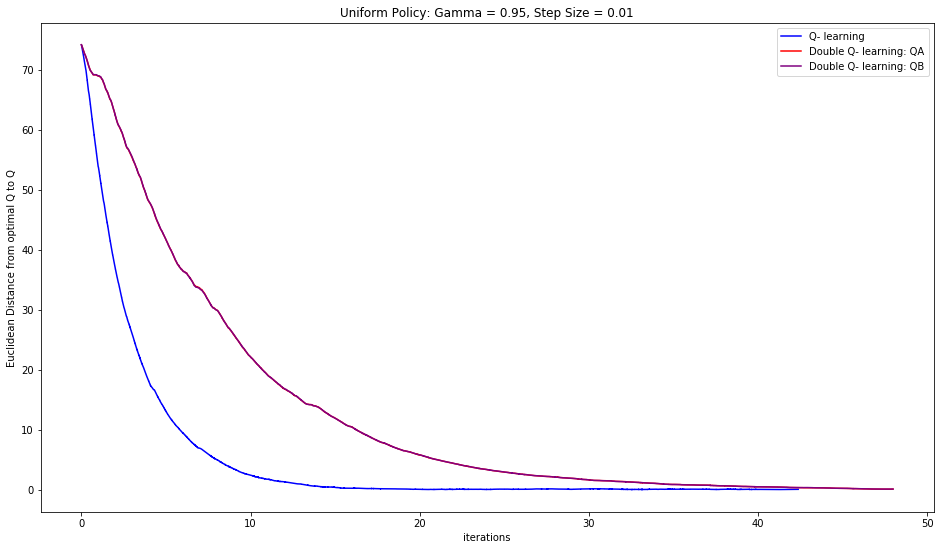

In [12]:
### initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)


class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 700000, min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        #self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.step_size = 0.01
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.QA = np.zeros((env.num_state, env.num_action)) 
        self.QB = np.zeros((env.num_state, env.num_action))
        self.QTable = np.zeros((env.num_state, env.num_action))


    def action(self, state):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        #print("a:", action)
        #action = list(self.env.actions).index(action)
        #print("i:", action)
        return action
    
    def chooseQ_function(self):
        return random.choice(["QA", "QB"])
    
    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])

    def QA_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QA-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        #self.QTable[state][action] += alpha * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        self.QA[state][action] += step_size * (reward + self.gamma * (self.QB[new_state][action_prime]) - self.QA[state][action])
        return
    
    def QB_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QB-values'''
        self.QB[state][action] += step_size * (reward + self.gamma * (self.QA[new_state][action_prime]) - self.QB[state][action])
        return
    
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
def Doublelearning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QAList = []
    QBList = []
    timeList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    start_time1 = time.time()
    for e in range(Qlearning.max_episodes):
        #print("q", Qlearning.max_episodes)
        #print(e)
        if e % 100000 == 0:
            print(e)
         #self.env.reset()
        step_size = Qlearning.step_size
        action = Qlearning.action(state)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        if Qlearning.chooseQ_function() == "QA":
            action_prime = np.argmax(Qlearning.QA[new_state])
            Qlearning.QA_Update(state, action, action_prime, reward, new_state, step_size)
        if Qlearning.chooseQ_function() == "QB":
            action_prime = np.argmax(Qlearning.QB[new_state])
            Qlearning.QB_Update(state, action, action_prime, reward, new_state, step_size)
            #self.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QAList.append(np.linalg.norm(Qlearning.QA - Qlearning.QFunction))
        QBList.append(np.linalg.norm(Qlearning.QB - Qlearning.QFunction))
        timeList.append(time.time() - start_time1)
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
        #print(Qlearning.QA)
    return QAList, QBList, timeList
    
def learning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    timeList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    start_time2 = time.time()
    for e in range(Qlearning.max_episodes):
        if e % 100000 == 0:
            print(e)
        step_size = Qlearning.step_size
        action = Qlearning.action(state)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        Qlearning.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QList.append(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction))
        timeList.append(time.time() - start_time2)
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
    return QList, timeList
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)  #MarkovDP)
    QAList, QBList, time2 = Doublelearning(solve)
    #print(time2)
    print("QA:", min(QAList))
    print("QB:", min(QBList))
    #print(QAList)
    print("--- Double Q took %s seconds ---" % (time.time() - start_time))
    start_time = time.time()
    solve = Qlearning(env)#MarkovDP
    QList, time1 = learning(solve)
    #print(time1)
    print("Q:", min(QList))
    #print(QList)
    print("--- Regular Q took %s seconds ---" % (time.time() - start_time))
    # print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    ax2 = fig.add_subplot(111)
    ax2.plot(time1, QList,  
             color='b',
             label='Q- learning')
    ax2.plot(time2, QAList,   
             color='r',
             label='Double Q- learning: QA')
    ax2.plot(time2, QBList, 
             color='purple',
             label='Double Q- learning: QB')
    ax2.set(title='Uniform Policy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Euclidean Distance from optimal Q to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()
    
# it reduces at exactly the same rate and has a longer rate of convergence than regualr Q learning (is this because of the lack of overestimation??)

# Epsilon Greedy- Constant Step Size

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
QA: 0.46085249298585085
QB: 0.41199761386005046
--- Double Q took 100.8391580581665 seconds ---
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
Q: 0.9149648935115064
--- Regular Q took 193.82628297805786 seconds ---


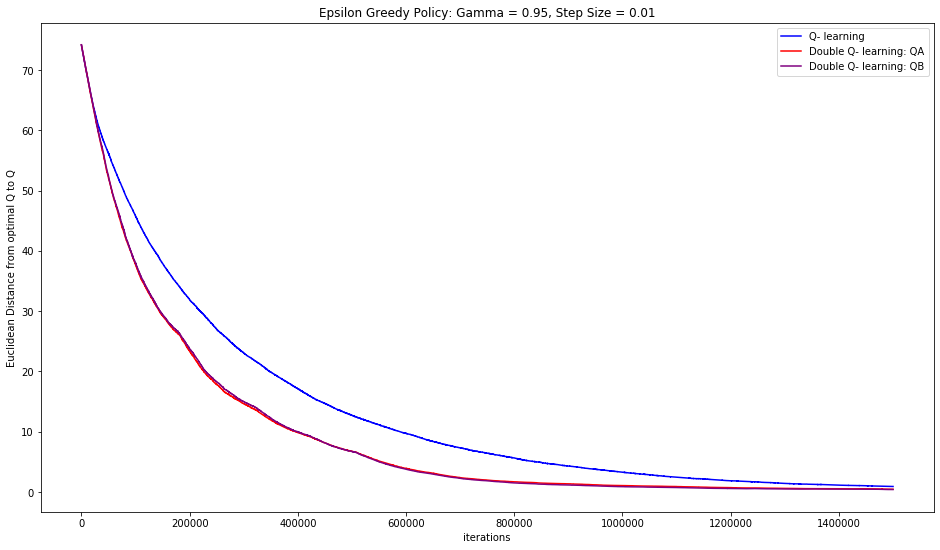

In [52]:
### initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)


class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 1500000, min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        #self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.QA = np.zeros((env.num_state, env.num_action)) 
        self.QB = np.zeros((env.num_state, env.num_action))
        self.QTable = np.zeros((env.num_state, env.num_action))


    def action(self, state, epsilon):
        qaValues = self.QA[state]
        qbValues = self.QB[state]
        qsum = (qaValues + qbValues) / len(qaValues)
        if np.random.random() <= epsilon:
            #print(self.env.actions)
            action = random.choice(self.env.actions)
            action = list(self.env.actions).index(action)
        else:
            action = np.argmax(qsum)  # exploitation
        return action
    
    def chooseQ_function(self):
        return random.choice(["QA", "QB"])
    
    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])

    def QA_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QA-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        #self.QTable[state][action] += alpha * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        self.QA[state][action] += step_size * (reward + self.gamma * (self.QB[new_state][action_prime]) - self.QA[state][action])
        return
    
    def QB_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QB-values'''
        self.QB[state][action] += step_size * (reward + self.gamma * (self.QA[new_state][action_prime]) - self.QB[state][action])
        return
    
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
def Doublelearning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QAList = []
    QBList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):
        if e % 100000 == 0:
            print(e)
        step_size = 0.01 #self.decay_step_size(e)
        epsilon = Qlearning.decay_epsilon()
        action = Qlearning.action(state, epsilon)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        if Qlearning.chooseQ_function() == "QA":
            action_prime = np.argmax(Qlearning.QA[new_state])
            Qlearning.QA_Update(state, action, action_prime, reward, new_state, step_size)
        if Qlearning.chooseQ_function() == "QB":
            action_prime = np.argmax(Qlearning.QB[new_state])
            Qlearning.QB_Update(state, action, action_prime, reward, new_state, step_size)
        state = new_state
        QAList.append(np.linalg.norm(Qlearning.QA - Qlearning.QFunction))
        QBList.append(np.linalg.norm(Qlearning.QB - Qlearning.QFunction))
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
        #print(Qlearning.QA)
    return QAList, QBList
    
def learning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):
        if e % 100000 == 0:
            print(e)
        step_size = 0.01 #self.decay_step_size(e)
        epsilon = Qlearning.decay_epsilon()
        action = Qlearning.action(state, epsilon)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        Qlearning.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QList.append(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction))
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
    return QList
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)  #MarkovDP)
    QAList, QBList = Doublelearning(solve)
    
    print("QA:", min(QAList))
    print("QB:", min(QBList))
    #print(QAList)
    print("--- Double Q took %s seconds ---" % (time.time() - start_time))
    
    solve = Qlearning(env)#MarkovDP)
    
    QList = learning(solve)
    print("Q:", min(QList))
    #print(QList)
    print("--- Regular Q took %s seconds ---" % (time.time() - start_time))
    # print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q- learning')
    ax2.plot(QAList,  # epsilon_hist,
             color='r',
             label='Double Q- learning: QA')
    ax2.plot(QBList,  # epsilon_hist,
             color='purple',
             label='Double Q- learning: QB')
    ax2.set(title='Epsilon Greedy Policy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Euclidean Distance from optimal Q to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()
    
# it reduces at exactly the same rate and has a longer rate of convergence than regualr Q learning (is this because of the lack of overestimation??)

the results match for the epsilon greedy but not the uniform policy. This is in line with the paper as the paper al worked for epsilon greedy. One interesting observation to make however, is the runtimes (Double Q learning take about half the time that Regular Q learning does)

# Epsilon Greedy- Constant Step Size: Runtime

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
QA: 0.09534856069316036
QB: 0.08408842469797581
--- Double Q took 121.16883397102356 seconds ---
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
Q: 0.8131203191904351
--- Regular Q took 103.61947298049927 seconds ---


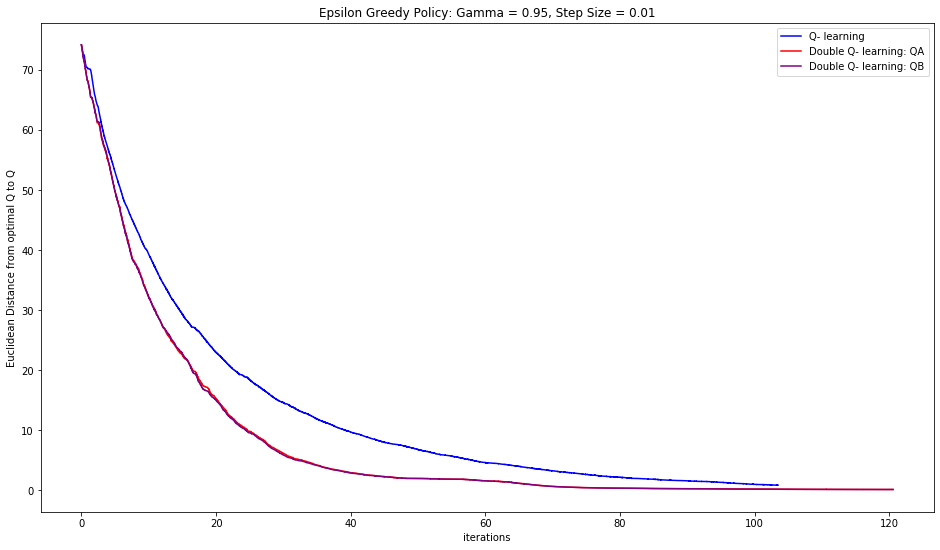

In [13]:
### initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)


class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 1500000, min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        #self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.QA = np.zeros((env.num_state, env.num_action)) 
        self.QB = np.zeros((env.num_state, env.num_action))
        self.QTable = np.zeros((env.num_state, env.num_action))


    def action(self, state, epsilon):
        qaValues = self.QA[state]
        qbValues = self.QB[state]
        qsum = (qaValues + qbValues) / len(qaValues)
        if np.random.random() <= epsilon:
            #print(self.env.actions)
            action = random.choice(self.env.actions)
            action = list(self.env.actions).index(action)
        else:
            action = np.argmax(qsum)  # exploitation
        return action
    
    def chooseQ_function(self):
        return random.choice(["QA", "QB"])
    
    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])

    def QA_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QA-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        #self.QTable[state][action] += alpha * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        self.QA[state][action] += step_size * (reward + self.gamma * (self.QB[new_state][action_prime]) - self.QA[state][action])
        return
    
    def QB_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QB-values'''
        self.QB[state][action] += step_size * (reward + self.gamma * (self.QA[new_state][action_prime]) - self.QB[state][action])
        return
    
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
def Doublelearning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QAList = []
    QBList = []
    timeList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    start_time = time.time()
    for e in range(Qlearning.max_episodes):
        if e % 100000 == 0:
            print(e)
        step_size = 0.01 #self.decay_step_size(e)
        epsilon = Qlearning.decay_epsilon()
        action = Qlearning.action(state, epsilon)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        if Qlearning.chooseQ_function() == "QA":
            action_prime = np.argmax(Qlearning.QA[new_state])
            Qlearning.QA_Update(state, action, action_prime, reward, new_state, step_size)
        if Qlearning.chooseQ_function() == "QB":
            action_prime = np.argmax(Qlearning.QB[new_state])
            Qlearning.QB_Update(state, action, action_prime, reward, new_state, step_size)
        state = new_state
        QAList.append(np.linalg.norm(Qlearning.QA - Qlearning.QFunction))
        QBList.append(np.linalg.norm(Qlearning.QB - Qlearning.QFunction))
        timeList.append(time.time() - start_time)
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
        #print(Qlearning.QA)
    return QAList, QBList, timeList
    
def learning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    timeList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    start_time = time.time()
    for e in range(Qlearning.max_episodes):
        if e % 100000 == 0:
            print(e)
        step_size = 0.01 #self.decay_step_size(e)
        epsilon = Qlearning.decay_epsilon()
        action = Qlearning.action(state, epsilon)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        Qlearning.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QList.append(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction))
        timeList.append(time.time() - start_time)
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
    return QList, timeList
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)  #MarkovDP)
    QAList, QBList, time2 = Doublelearning(solve)
    print("QA:", min(QAList))
    print("QB:", min(QBList))
    #print(QAList)
    print("--- Double Q took %s seconds ---" % (time.time() - start_time))
    start_time = time.time()
    solve = Qlearning(env)#MarkovDP)
    QList, time1 = learning(solve)
    print("Q:", min(QList))
    #print(QList)
    print("--- Regular Q took %s seconds ---" % (time.time() - start_time))
    # print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    ax2 = fig.add_subplot(111)
    ax2.plot(time1, QList,  # epsilon_hist,
             color='b',
             label='Q- learning')
    ax2.plot(time2, QAList,  # epsilon_hist,
             color='r',
             label='Double Q- learning: QA')
    ax2.plot(time2, QBList,  # epsilon_hist,
             color='purple',
             label='Double Q- learning: QB')
    ax2.set(title='Epsilon Greedy Policy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Euclidean Distance from optimal Q to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()
    
# it reduces at exactly the same rate and has a longer rate of convergence than regualr Q learning (is this because of the lack of overestimation??)

# Boltzmann- Constant Step Size

0
100000
200000
300000
400000
500000
600000
QA: 0.039911417110642916
QB: 0.04243782920418624
--- Double Q took 52.53061580657959 seconds ---
0
100000
200000
300000
400000
500000
600000
Q: 0.034587363970271165
--- Regular Q took 103.105801820755 seconds ---


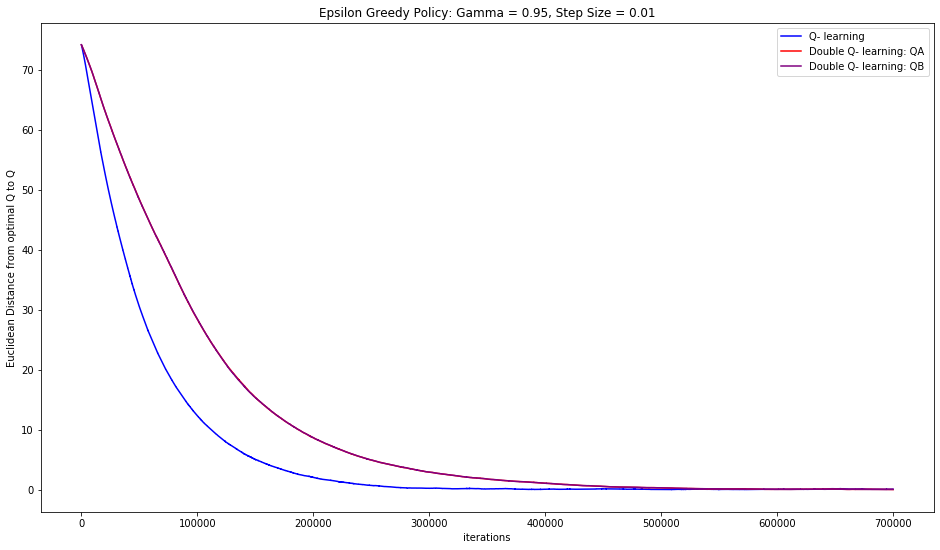

In [7]:
### initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.random.rand(self.num_action, self.num_state) #   ( self.num_state,self.num_state)


class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 700000, min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.95, decay = 25, solved=False, tau = 1000, tau_decay = True, decay_factor_tau = 1.0):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        #self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]])        
        #self.QTable = np.ones((env.num_state, env.num_action))
        self.QA = np.zeros((env.num_state, env.num_action)) 
        self.QB = np.zeros((env.num_state, env.num_action))
        self.QTable = np.zeros((env.num_state, env.num_action))
        self.tau = 100000    # tau --> 0 pure exploitation tau --> infinity pure exploration
        self.tau_decay = True
        self.decay_factor_tau = 1.5 

    def action(self, state, tau):
        qaValues = self.QA[state]
        qbValues = self.QB[state]
        qList = (qaValues + qbValues) / len(qaValues)
        #qList = self.QTable[state] #moves = self.q_matrix[pos_index]
        self.actions = [i for i in range(0, self.env.num_action)]
        if self.tau > 0.0:
            action_probs_numes = []
            denom = 0
            for q in qList:
                val = math.exp(q / self.tau)
                action_probs_numes.append(val)
                denom += val  # summation of the values
            action_probs = []
            for x in action_probs_numes:
                probs = x / denom 
                action_probs.append(probs)    
            prob_sum = 0
            action = random.choices(self.actions, weights=action_probs, k=1)[0] # the weights give a weight to correspond 
        else:
            
            action = np.argmax(qList)
        return action
    
    def chooseQ_function(self):
        return random.choice(["QA", "QB"])
    
    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])

    def QA_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QA-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        #self.QTable[state][action] += alpha * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        self.QA[state][action] += step_size * (reward + self.gamma * (self.QB[new_state][action_prime]) - self.QA[state][action])
        return
    
    def QB_Update(self, state, action, action_prime, reward, new_state, step_size):
        ''' Update the QB-values'''
        self.QB[state][action] += step_size * (reward + self.gamma * (self.QA[new_state][action_prime]) - self.QB[state][action])
        return
    
    def decay_tau(self, t):          
        if self.tau_decay is True:
            #print(t)
            new_tau = self.tau - self.decay_factor_tau
        if new_tau < 1.0:
            self.tau = 1.0
        else:
            self.tau = new_tau
        return new_tau  
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
def Doublelearning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QAList = []
    QBList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):
        if e % 100000 == 0:
            print(e)
        step_size = 0.01 #self.decay_step_size(e)
        epsilon = Qlearning.decay_tau(e)
        action = Qlearning.action(state, epsilon)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        if Qlearning.chooseQ_function() == "QA":
            action_prime = np.argmax(Qlearning.QA[new_state])
            Qlearning.QA_Update(state, action, action_prime, reward, new_state, step_size)
        if Qlearning.chooseQ_function() == "QB":
            action_prime = np.argmax(Qlearning.QB[new_state])
            Qlearning.QB_Update(state, action, action_prime, reward, new_state, step_size)
        state = new_state
        QAList.append(np.linalg.norm(Qlearning.QA - Qlearning.QFunction))
        QBList.append(np.linalg.norm(Qlearning.QB - Qlearning.QFunction))
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
        #print(Qlearning.QA)
    return QAList, QBList
    
def learning(Qlearning):
    #print(Qlearning.QA)
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    state = np.random.randint(0, Qlearning.env.num_state)
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):
        if e % 100000 == 0:
            print(e)
        step_size = 0.01 #self.decay_step_size(e)
        epsilon = Qlearning.decay_tau(e)
        action = Qlearning.action(state, epsilon)
        transitionVector = Qlearning.env.transitions[action][state]
        new_state = random.choices(population=Qlearning.env.states, weights=list(transitionVector))
        new_state = new_state[0]
        reward = Qlearning.env.rewards[action][state]
        Qlearning.Q_Update(state, action, reward, new_state, step_size)
        state = new_state
        QList.append(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction))
        alphaList.append(step_size)
        #epsilonList.append(epsilon)
        mean_rewards =  np.mean(rewards)
    return QList
    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)  #MarkovDP)
    QAList, QBList = Doublelearning(solve)
    
    print("QA:", min(QAList))
    print("QB:", min(QBList))
    #print(QAList)
    print("--- Double Q took %s seconds ---" % (time.time() - start_time))
    
    solve = Qlearning(env)#MarkovDP)
    
    QList = learning(solve)
    print("Q:", min(QList))
    #print(QList)
    print("--- Regular Q took %s seconds ---" % (time.time() - start_time))
    # print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    ax2 = fig.add_subplot(111)
    ax2.plot(QList,  # epsilon_hist,
             color='b',
             label='Q- learning')
    ax2.plot(QAList,  # epsilon_hist,
             color='r',
             label='Double Q- learning: QA')
    ax2.plot(QBList,  # epsilon_hist,
             color='purple',
             label='Double Q- learning: QB')
    ax2.set(title='Epsilon Greedy Policy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Euclidean Distance from optimal Q to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()
    
# it reduces at exactly the same rate and has a longer rate of convergence than regualr Q learning (is this because of the lack of overestimation??)

It seems like Q learning has better results all generally with it prefroming better in terms of number of iterations till convergence with a uniform policy (both constant and diminishing step size). However in Epsilon Greedy it was a similar effect. However under a Boltzmann Policy, Q learning still converged in a smaller number of iterations but took nearlt twice the time. This results are overall inconclusive in terms of whether double Q Learning or online Q Learning is more effective. 
- Uniform Policy- Q learning starts to converge faster than Double. And QB and QA work at the same/similar pace. 
